In [1]:
# Basic imports
import numpy as np
import pandas as pd
import seaborn as sns

from dataframe.csv_utils import (
    load_data_from_csv,
    get_filtered_data,
)

from constants import SORTED_BLOCK_NAMES, AUDIO_BLOCKS, COLOR_MAP, V_COLOR_MAP

In [2]:
dir_name = "eeg_features2"
result = load_data_from_csv(dir_name)

In [3]:
all_blocks = []
for b in SORTED_BLOCK_NAMES:
    all_blocks.extend([b] * 13)

result["condition"] = all_blocks * len(result.Subject.unique())
mask = result["condition"].isin(AUDIO_BLOCKS)
audio_only = result[mask]

In [4]:
audio_only.head()

,A1 _DELTA,A1 _THETA,A1 _ALPHA,A1 _BETA1,A1 _BETA2,A1 _GAMMA,A2_DELTA,A2_THETA,A2_ALPHA,A2_BETA1,...,D32_THETA,D32_ALPHA,D32_BETA1,D32_BETA2,D32_GAMMA,Valence,Arousal,Attention,Subject,condition
0,5.975900,8.041757,5.178926,1.857939,0.501972,0.765728,6.552273,10.067936,6.183542,2.204008,...,15.303243,17.866826,4.288558,1.079649,1.515221,0.78125,0.69125,1.0,2039,audio_hvha
1,6.176178,5.107151,8.298386,2.018895,0.610383,0.927631,4.061859,4.209855,5.627352,1.593101,...,26.970415,33.351720,6.959950,1.919271,3.087424,0.73000,0.63625,1.0,2039,audio_hvha
2,6.974355,3.147848,5.556222,2.351340,0.664300,0.959141,4.647510,2.657576,3.838643,1.823151,...,21.133457,21.555540,6.742066,2.278783,3.521508,0.63875,0.75250,1.0,2039,audio_hvha
3,5.994952,3.779647,6.827772,2.386871,0.681430,0.938295,4.377316,3.378702,4.825776,1.779929,...,24.338972,28.213202,7.766116,2.216341,3.240139,0.58375,0.76000,1.0,2039,audio_hvha
4,6.765295,3.782661,7.182258,2.427768,0.766634,0.903078,4.302844,2.821930,4.937060,1.944116,...,22.350770,27.731115,6.719762,2.063623,2.569750,0.65375,0.58500,1.0,2039,audio_hvha


<AxesSubplot:xlabel='Valence', ylabel='Arousal'>

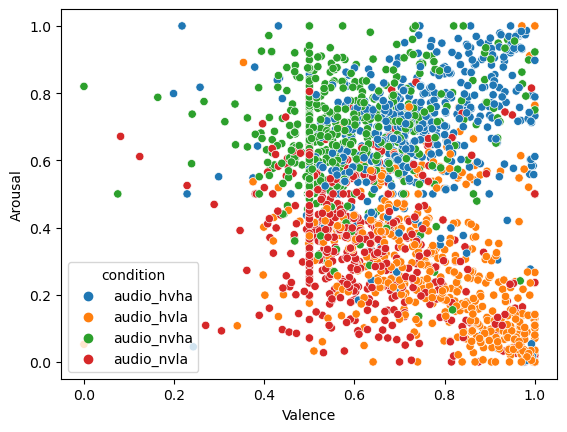

In [5]:
sns.scatterplot(data=audio_only, x="Valence", y="Arousal", hue="condition")

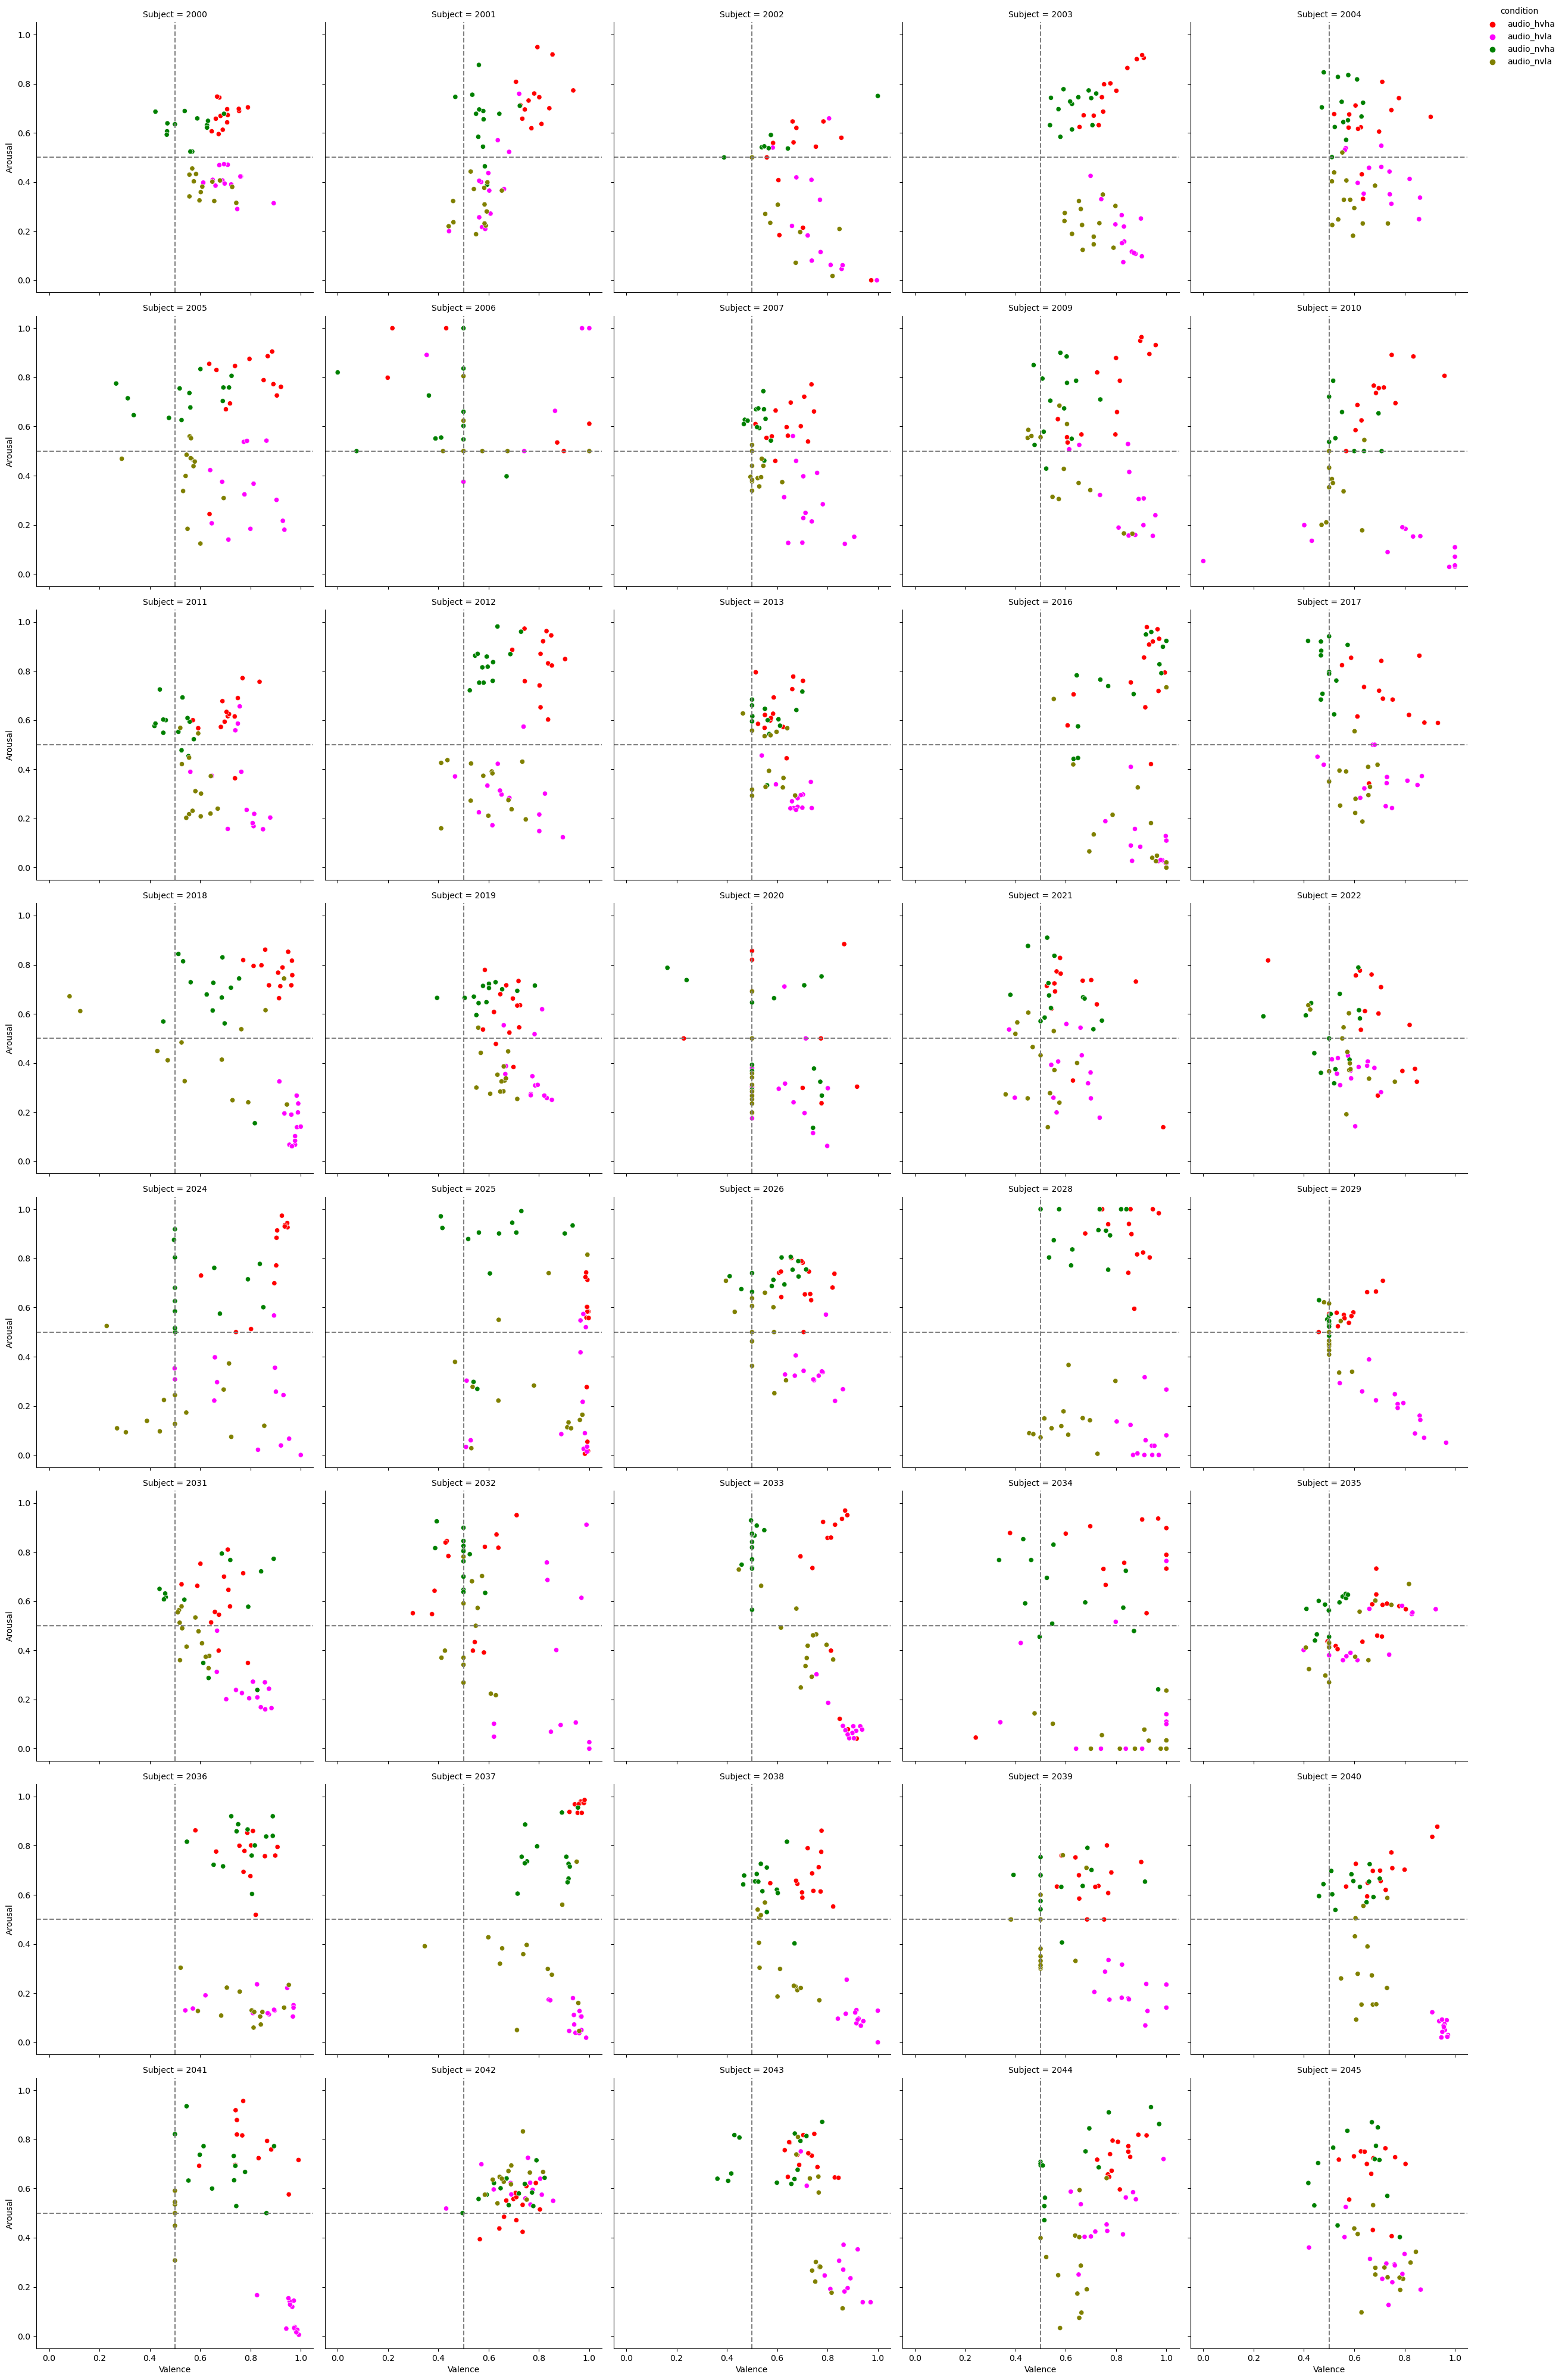

In [15]:
g = sns.relplot(
    data=audio_only,
    x="Valence",
    y="Arousal",
    col="Subject",
    hue="condition",
    col_wrap=5,
    palette=COLOR_MAP,
    kind="scatter",
)

sns.move_legend(g, "upper right")

for _, ax in g.axes_dict.items():
    ax.axhline(y = 0.5, color = "grey", linestyle = "dashed")
    ax.axvline(x = 0.5, color = "grey", linestyle = "dashed") # To the right